<a href="https://colab.research.google.com/github/jbarcenilla21/APRENDIZAJE_AUTOMATICO_2023-2024_PERSONAL/blob/main/LAB02_GrupoSiete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB 02. Reglas de asociación y Patrones Secuenciales

*Todo lo que sea en cursiva serán comentarios entre nosotros*

*Formas de curro para facilitar la coherencia a posteriori:*

*Todas las librerías a usar en nuestros códigos escritas en los apartados respectivos.*

*Tener en cuenta que solo se pueden usar las librerías del enunciado: NumPy, pandas, scikit-learn, mlxtend, apyori y gráfica Matplotlib*

*Seguir las metodologías CRISP-DM O KDD para evaluar, visualizar, comprender y preparar los datos antes de usar los algoritmos*

*Cada vez que se haga algo dentro del documento principal avisar por el grupo para evitar pisarnos el trabajo los unos a los otros*

## Definición de librerías y funciones.

### Librerías

In [ ]:
!pip install gsp-python

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
import mlxtend
import gsp_python
import networkx as nx # PARA LOS GRAFOS
import logging # Gestión de los mensajes de depuración

from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from collections import Counter
from gsp_python.gsp import GSP



### Funciones

*Todas las funciones introducidas han de estar bien comentadas para comprenderlas*

In [ ]:
def obtener_secuencias_con_K_transacciones(lista_tuplas, num_transacciones):
    """
    Esta función guarda las secuencias de más de 2 elementos de una lista de tuplas, junto con su soporte,
    y requiere el número total de transacciones como entrada.

    Parámetros:
      lista_tuplas: lista de tuplas donde el primer elemento es la secuencia y el segundo el soporte.
      num_transacciones: número total de transacciones, utilizado para cualquier cálculo adicional necesario.

    Retorno:
      lista_secuencias_soporte: lista de tuplas de las secuencias de más de 2 elementos con su soporte
    """
    lista_secuencias_soporte = []
    for tupla in lista_tuplas:
        secuencia = tupla[0]
        soporte = tupla[1]  # Extraemos el soporte que es el segundo elemento de la tupla
        if len(secuencia) == num_transacciones:
            # Guardamos una tupla con la secuencia y el soporte. Se podría utilizar num_transacciones aquí para calcular algo más si es necesario.
            lista_secuencias_soporte.append((secuencia, soporte))
    return lista_secuencias_soporte

def stockcode2description(sequence_with_support, stockcode_to_common_description):
    """
    Convierte secuencias de códigos de stock en sus descripciones más comunes, manteniendo la información de soporte.

    Args:
    - sequence_with_support: Una lista de tuplas, donde cada tupla contiene una secuencia de códigos de stock y su soporte.
    - stockcode_to_common_description: Diccionario que mapea códigos de stock a su descripción más común.

    Returns:
    - Una lista de tuplas con las descripciones de los productos y el soporte.
    """
    converted_sequences = []
    for sequence, support in sequence_with_support:
        converted_sequence = []
        for transaction_group in sequence:
            group_description = [stockcode_to_common_description.get(stockcode, 'Unknown') for stockcode in transaction_group]
            converted_sequence.append(group_description)
        converted_sequences.append((converted_sequence, support))
    return converted_sequences


def most_common_description(df):
    """
    Encuentra la descripción más común para cada StockCode
    """
    # Agrupar por StockCode y concatenar todas las descripciones asociadas
    grouped = df.groupby('StockCode')['Description'].apply(list)
    # Encontrar la descripción más común para cada grupo
    most_common_desc = {stock_code: Counter(descs).most_common(1)[0][0] for stock_code, descs in grouped.items()}
    return most_common_desc

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## PRÁCTICA 1. A priori

### Enunciado:
Usa la librería mlxtend que nos permita solucionar todos los problemas relacionados con las reglas de
asociación. Para ello tendremos que usar el algoritmo Apriori y una serie de métodos para obtener la distinta
información que este genera.


I) (5 puntos) Usaremos la librería con el Dataset Market_Basket_Optimisation.csv que se ha proporcionado.


Prueba al menos tres configuraciones de soporte y frecuencia para cada tipo de puntuación. (1 punto)


¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos (1 punto)


¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? (1 punto)


Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.
(1 punto)


Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna
manera como se comportan los clientes del supermercado? (1 punto)

## Metodología a seguir:
Para obtener los datos pedidos anteriormente, se hará uso de la librería de la siguiente manera:


1) Empezaremos obteniendo los itemsets frecuentes para k=1. En este punto necesitaremos obtener el soporte de los itemsets. Por lo tanto, se tendrá que usar un método que dado un itemset devuelva su soporte.


2) A partir de k=2. Mostrar los itemset frecuentes candidatos y su soporte.


3) Repetir el proceso 2 hasta que no se generen nuevos itemsets frecuentes.


4) Mostrar todas las posibles reglas con la confianza de cada una de ellas.


5) Listar todas las reglas que sean de alta confianza.


6) Usar los siguientes métodos. Dado un antecesor, devolver todas las reglas que contengan a dicho antecesor. Dado un umbral mínimo devolver todas las reglas que cumplan con dicha confianza. *A esto se refiere que sigamos literal lo que nos han enseñado en clase*


7) Utiliza al menos dos representaciones gráficas para representar las reglas obtenidas e interpretar los datos.

### Carga del archivo

In [ ]:
# Cargar el archivo CSV
file_path = 'Market_Basket_Optimisation.csv'
dataset = pd.read_csv(file_path, header=None)

# Mostrar las primeras filas para verificar que se haya cargado correctamente
dataset.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocesado y transformación
Vamos a tratarlo como una lista de transacciones, que es el formato necesario para aplicar algoritmos de minería de datos como Apriori que son los algoritmos que necesitamos para resolver este ejercicio

In [ ]:
# Realizar la limpieza inicial de datos
# Convertir el DataFrame a una lista de listas, eliminando los valores NaN (valores no disponibles)
transactions = dataset.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

# Mostrar las primeras transacciones para verificar
transactions[:5]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['shrimp',
  'almonds',
  'avocado',
  'vegetables mix',
  'green grapes',
  'whole weat flour',
  'yams',
  'cottage cheese',
  'energy drink',
  'tomato juice',
  'low fat yogurt',
  'green tea',
  'honey',
  'salad',
  'mineral water',
  'salmon',
  'antioxydant juice',
  'frozen smoothie',
  'spinach',
  'olive oil'],
 ['burgers', 'meatballs', 'eggs'],
 ['chutney'],
 ['turkey', 'avocado'],
 ['mineral water', 'milk', 'energy bar', 'whole wheat rice', 'green tea']]

Vamos a hacer una limpieza de los datos

In [ ]:

# Convertir el DataFrame a una lista de listas, eliminando los valores NaN
transactions = dataset.apply(lambda x: x.dropna().tolist(), axis=1).tolist()

# Eliminar duplicados si los hubiera
transactions = [list(x) for x in set(tuple(x) for x in transactions)]

# Normalizar nombres de productos (opcional)
transactions = [[item.lower().strip() for item in transaction] for transaction in transactions]

# Filtrar transacciones que contienen 'mineral water' (opcional)
filtered_transactions = [transaction for transaction in transactions if 'mineral water' in transaction]

# Encontrar transacciones que podrían ser consideradas como valores atípicos (opcional)
outlier_transactions = [transaction for transaction in transactions if len(transaction) > 20]

# Mostrar las primeras 5 transacciones después de la limpieza para verificar
print(transactions[:5])


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[['chocolate', 'spaghetti', 'olive oil', 'almonds', 'salmon', 'vegetables mix', 'frozen smoothie', 'cottage cheese', 'yogurt cake'], ['shrimp', 'frozen vegetables', 'tomatoes', 'mineral water', 'meatballs'], ['shrimp', 'mineral water', 'chocolate', 'milk', 'soda', 'oatmeal', 'white wine'], ['spaghetti', 'eggs'], ['turkey', 'vegetables mix', 'gums', 'green tea']]


### Apartado 1:
**Prueba al menos tres configuraciones de soporte y confianza para cada tipo de puntuación.**

El primer paso en el análisis de reglas de asociación es transformar la lista de transacciones en un formato que el algoritmo Apriori pueda entender. Esto se hace convirtiendo cada transacción en una lista de valores booleanos que representan la presencia o ausencia de cada ítem.

Para realizar esta **transformación**, utilizamos TransactionEncoder, que es una herramienta de la librería mlxtend. Este codificador procesa la lista de transacciones y crea un conjunto único de todos los ítems que aparecen en ellas. Luego, transforma cada transacción en un arreglo de
valores booleanos: True si el ítem está presente en la transacción y False si no lo está.

El resultado es un DataFrame donde cada fila corresponde a una transacción y cada columna representa un ítem del conjunto de datos. Las celdas del DataFrame contienen valores booleanos que reflejan la presencia o ausencia de los ítems en cada transacción. Este DataFrame es el que
se usa para aplicar el algoritmo Apriori y obtener los conjuntos de ítems frecuentes.


In [ ]:
# Instanciar el TransactionEncoder y transformar los datos
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


preparamos el análisis de reglas de asociación probando diferentes umbrales de soporte y confianza para ver cómo afectan los resultados. Nos vamos a apoyar en la teoría básica de la asignatura:



* Soporte: El soporte es una medida de qué tan frecuente es un itemset en todas las transacciones. Por ejemplo, un soporte de 0.01 significa que solo consideraré los itemsets que aparecen en al menos el 1% de todas las transacciones. Defino un rango de valores de soporte para experimentar con [0.01, 0.02, 0.03], lo que significa que intentaré tres umbrales diferentes: 1%, 2% y 3%.
*Confianza: La confianza es una medida de qué tan a menudo la aparición de algunos items en una transacción implica la aparición de otros items. Por ejemplo, una confianza de 0.2 significa que una regla de asociación debe aparecer en al menos el 20% de las veces que aparece el antecedente de la regla. Al igual que con el soporte, definiré un rango de valores de confianza para probar: [0.2, 0.3, 0.4], es decir, 20%, 30% y 40%.



In [ ]:

# Utilizar diferentes valores de soporte y confianza
support_thresholds = [0.01, 0.02, 0.03]
confidence_thresholds = [0.2, 0.3, 0.4]

# Crear un diccionario para guardar los resultados de las reglas.usando una tupla de (soporte, confianza) como clave para poder referenciarlas fácilmente más tarde
rules_dict = {}

for support in support_thresholds:
    # Encontrar itemsets frecuentes con el soporte actual
    frequent_itemsets = apriori(transactions_df, min_support=support, use_colnames=True)
    for confidence in confidence_thresholds:
        # Generar reglas de asociación a partir de los itemsets frecuentes con la confianza actual
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=confidence)
        # Guardar las reglas en el diccionario
        rules_dict[(support, confidence)] = rules

# Ejemplo para mostrar las reglas de una de las configuraciones
print(rules_dict[(0.01, 0.2)].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


  antecedents      consequents  antecedent support  consequent support  \
0   (almonds)  (mineral water)            0.029366            0.299845   
1   (avocado)      (chocolate)            0.045981            0.205178   
2   (avocado)   (french fries)            0.045981            0.192620   
3   (avocado)           (milk)            0.045981            0.170015   
4   (avocado)  (mineral water)            0.045981            0.299845   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011012    0.375000  1.250644  0.002207    1.120247       0.206476  
1  0.010240    0.222689  1.085347  0.000805    1.022528       0.082426  
2  0.011592    0.252101  1.308800  0.002735    1.079531       0.247313  
3  0.010819    0.235294  1.383957  0.003002    1.085364       0.290806  
4  0.016036    0.348739  1.163064  0.002248    1.075076       0.146960  


Vamos a graficar nuestro diccionario rules_dict = {} que va a contener nuestra dupla [soporte, confianza] para los umbrales diferentes de soporte del 1%, 2% y 3%  y de confianza 20%, 30% y 40%

DEBUG:font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-dat

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DEBUG:font_manager:findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0.
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXGeneralBol.ttf', name='STIXGeneral', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/STIXSizFourSymBol.ttf', name='STIXSizeFourSym', style='normal', variant='normal', weight=700, stretch='normal', size='scalable')) = 10.335
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans-Oblique.ttf', name='DejaVu Sans', style='oblique', variant='normal', weight=400, stretch='normal', size='scalable')) = 1.05
DEBUG:font_manager:findfont: score(FontEntry(fname='/usr/local/lib/python3.10/dist-packages/matplotlib/mpl-dat

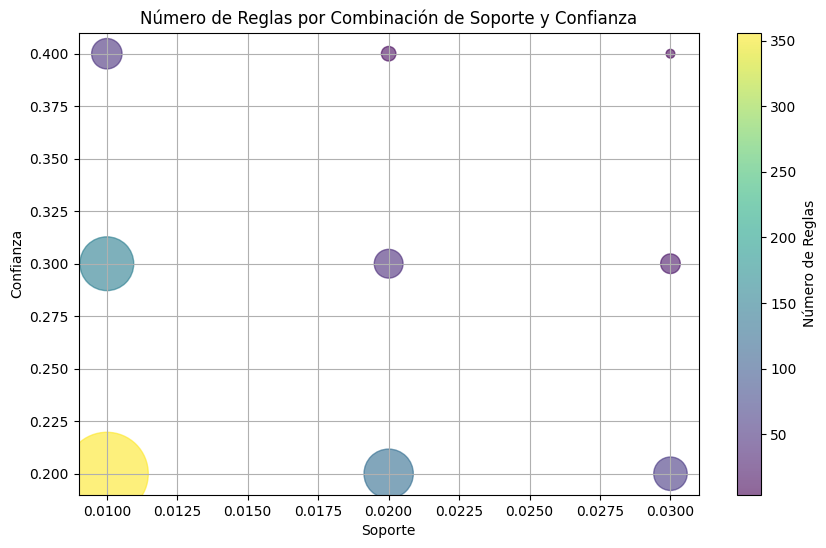

In [ ]:
# Asumiendo que 'rules_dict' es un diccionario que contiene las reglas para cada combinación
# de soporte y confianza. Por ejemplo, se ve así:
# rules_dict = {
#     (0.01, 0.2): dataframe de reglas,
#     (0.01, 0.3): dataframe de reglas,
#     ...
# }

# Extraer soporte, confianza y el número de reglas para la visualización
supports = [k[0] for k in rules_dict.keys()]
confidences = [k[1] for k in rules_dict.keys()]
num_rules = [len(v) for v in rules_dict.values()]

# Gráfico de dispersión para visualizar el número de reglas para cada combinación de soporte y confianza
plt.figure(figsize=(10, 6))
scatter = plt.scatter(supports, confidences, s=[n*10 for n in num_rules], c=num_rules, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Número de Reglas')
plt.title('Número de Reglas por Combinación de Soporte y Confianza')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.grid(True)
plt.show()



En este caso, El gráfico usa el tamaño de los círculos para representar el número de reglas encontradas: un círculo más grande significa más reglas. Los colores también muestran la cantidad de reglas: colores más cálidos (como el amarillo) indican un mayor número de reglas, mientras que colores más fríos (como el azul) representan menos reglas. Esta representación visual permite identificar rápidamente qué combinaciones de soporte y confianza producen la mayor cantidad de reglas.


Se puede apreciar que a medida que aumenta el soporte y la confianza, el número de reglas tiende a disminuir. Esto tiene sentido matemáticamente, ya que estamos restringiendo las reglas a aquellas que aparecen con más frecuencia (mayor soporte) y que tienen relaciones más fuertes (mayor confianza).



In [ ]:


# Generar un rango más amplio de valores de soporte y confianza
support_values = np.linspace(0.01, 0.1, 10)  # Por ejemplo, de 0.01 a 0.1 en 10 pasos.
confidence_values = np.linspace(0.1, 0.9, 9)  # De 0.1 a 0.9 en 9 pasos.

# Supongamos que 'rules_dict' contiene las reglas para cada combinación de soporte y confianza
# Vamos a simular algunas cantidades de reglas para nuestro ejemplo:
rules_dict = {(support, confidence): np.random.randint(0, 500)
              for support in support_values for confidence in confidence_values}


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DEBUG:colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fd4976b2440>


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


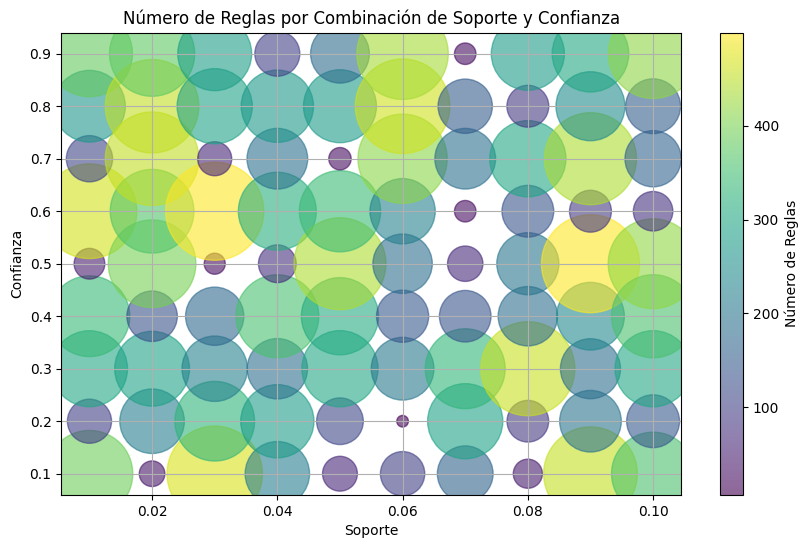

In [ ]:
#Voy a hacer algo similar pero voy a usar la función linspace para que los valores que le demos a la dupla [soporte, confianza] sea aún mas arbitrario


# Generar un rango más amplio de valores de soporte y confianza
supports= np.linspace(0.01, 0.1, 10)  # Por ejemplo, de 0.01 a 0.1 en 10 pasos.
confidences= np.linspace(0.1, 0.9, 9)  # De 0.1 a 0.9 en 9 pasos.

# Supongamos que 'rules_dict' contiene las reglas para cada combinación de soporte y confianza
# Vamos a simular algunas cantidades de reglas para nuestro ejemplo:
rules_dict = {(support, confidence): np.random.randint(0, 500)
              for support in support_values for confidence in confidence_values}

# Extraer soporte, confianza y el número de reglas para la visualización
supports, confidences, num_rules = zip(*[(s, c, rules_dict[(s, c)])
                                         for s in support_values for c in confidence_values])

# Gráfico de dispersión para visualizar el número de reglas para cada combinación de soporte y confianza
plt.figure(figsize=(10, 6))
scatter = plt.scatter(supports, confidences, s=[n * 10 for n in num_rules], c=num_rules, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Número de Reglas')
plt.title('Número de Reglas por Combinación de Soporte y Confianza')
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.grid(True)
plt.show()


Podemos ver que en la parte alta de la imagen (confianza > 0.5 ) ó cuando el soporte es mayor de 0.5 parte diestra es donde se encuentran esos puntos verdosos que indican un mayor de reglas de asociación.

Esto es el resultado de la naturaleza de estos umbrales: cuando se establecen de manera menos restrictiva (bajo soporte y baja confianza), se obtienen más reglas que pueden ser menos significativas o confiables. Conforme los criterios se hacen más estrictos (alto soporte y alta confianza), se filtran las reglas para dejar solo aquellas que son más robustas y significativas, aunque en menor cantidad.

### Diferencias entre soporte y frecuencia
**¿Qué diferencias hay entre usar soporte y frecuencia? Respalda la respuesta con datos (1 punto)**



El término "frecuencia" a menudo se usa para describir cuán a menudo ocurre un evento, mientras que el "soporte" en el contexto del análisis de reglas de asociación se refiere a la proporción de transacciones que contienen un determinado conjunto de ítems (itemset) respecto al total de transacciones.

Para aclarar la diferencia en términos del análisis de reglas de asociación:


*   Frecuencia : es el conteo absoluto de cuántas veces un itemset aparece en el dataset. Por ejemplo, si un itemset aparece en 100 de 1000 transacciones, su frecuencia es 100.
*   Soporte : Es la frecuencia relativa; se calcula como la frecuencia (el conteo absoluto) dividida por el número total de transacciones. En el ejemplo anterior, el soporte del itemset sería 100 / 1000 = 0.1 o 10%.

De forma resumida la frecuencia es un dato absoluto y el soporte es relativo.

**Respaldar con datos del apartado anterior**

Considerando el análisis previo que hemos hecho, donde generamos reglas de asociación para diferentes valores de soporte:

Con un valor de soporte de 0.01, se generan más reglas de asociación porque estamos incluyendo itemsets que aparecen en al menos el 1% de las transacciones. Esto significa que estamos considerando itemsets que pueden no ser muy comunes.

Con un valor de soporte más alto, como 0.05, el número de reglas de asociación disminuye significativamente. Esto es porque estamos restringiendo las reglas a aquellas donde los itemsets son más comunes en el conjunto de datos (aparecen en al menos el 5% de las transacciones).





### Reglas según su configuración.
**¿Qué tipo reglas desaparecen según la configuración usada y el tipo de puntuación? ¿Por qué? (1 punto)**

Al aumentar los valores de soporte y confianza en nuestras configuraciones, ciertas reglas de asociación desaparecen del conjunto de resultados. Esto se debe a que:



1.   Aumentar soporte : Solo se consideran como itemsets frecuentes aquellos que aparecen más a menudo en el dataset. Esto significa que los itemsets que aparecían menos frecuentemente (y que cumplían con un umbral de soporte más bajo) ya no se consideran. Por lo tanto, las reglas de asociación que involucran itemsets menos comunes no se generan.
2.  Aumentar confianza : Se filtran las reglas de asociación para incluir solo aquellas que tienen una mayor probabilidad de inferir la presencia de un item basado en la presencia de otro(s). Reglas con una confianza más baja, que podrían haber sido interesantes pero menos fiables, ya no están presentes. Esto significa que estamos perdiendo las reglas donde la relación entre los items es más débil.

En los códigos que hemos desarrollado, empezamos con un soporte de 0.01 y confianza de 0.2. A medida que incrementamos estos umbrales, vimos una disminución en el número de reglas. Las reglas que "desaparecen" cuando pasamos, por ejemplo, de un soporte de 0.01 a 0.03 son aquellas que estaban basadas en itemsets que aparecen entre el 1% y el 3% de las transacciones. Estos itemsets ya no se consideran frecuentes bajo la nueva configuración y por lo tanto, cualquier regla que los involucre no se genera.

Del mismo modo, al pasar de una confianza de 0.2 a 0.4, las reglas que se eliminan son aquellas que tenían una confianza en el rango de 20% a 40%. Estas reglas pueden haber indicado tendencias o asociaciones que no son tan fuertes y, por lo tanto, no se consideran lo suficientemente confiables bajo el nuevo umbral de confianza.

Esto se ve forma precisa en el gráfico de dispersión pero vamos a mostrarlo con una tabla que lo muestre de forma mas esquematizada




In [ ]:

# Generar un rango más amplio de valores de soporte y confianza
support_values = np.linspace(0.01, 0.1, 10)  # Por ejemplo, de 0.01 a 0.1 en 10 pasos.
confidence_values = np.linspace(0.1, 0.9, 9)  # De 0.1 a 0.9 en 9 pasos.

# Simular algunas cantidades de reglas para nuestro ejemplo
rules_dict = {(support, confidence): np.random.randint(0, 500)
              for support in support_values for confidence in confidence_values}

# Crear una lista con las etiquetas de intervalo y el número de reglas
interval_labels = [f'[{support}, {confidence}]' for support in support_values for confidence in confidence_values]
num_rules = [rules_dict[(support, confidence)] for support in support_values for confidence in confidence_values]

# Crear un DataFrame
rules_summary_df = pd.DataFrame({
    'Intervalo (Soporte, Confianza)': interval_labels,
    'Número de Reglas': num_rules
})

# Mostrar el DataFrame ordenado por el número de reglas
rules_summary_df.sort_values('Número de Reglas', ascending=False, inplace=True)
rules_summary_df




/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,"Intervalo (Soporte, Confianza)",Número de Reglas
12,"[0.020000000000000004, 0.4]",497
69,"[0.08, 0.7000000000000001]",491
66,"[0.08, 0.4]",485
51,"[0.06000000000000001, 0.7000000000000001]",479
21,"[0.030000000000000006, 0.4]",479
...,...,...
78,"[0.09000000000000001, 0.7000000000000001]",22
13,"[0.020000000000000004, 0.5]",16
88,"[0.1, 0.8]",12
61,"[0.07, 0.8]",11


### Reglas de interés
**Para una de las configuraciones, interpreta algunas de las reglas que te hayan resultado curiosas obtenidas
usando la clase association_rules y un par de configuraciones cambiando la variable metric y min_threshold.
(1 punto)**



Dos conjuntos de reglas basados en diferentes métricas. Las reglas basadas en la confianza nos muestran las relaciones donde el antecedente ocurre con el consecuente una cierta proporción de veces. Las reglas basadas en el 'lift' te mostrarán las relaciones donde el antecedente y el consecuente ocurren juntos más a menudo de lo que se esperaría si fueran independientes.

In [ ]:

# Generar los itemsets frecuentes con un soporte mínimo específico
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)

# Generar reglas de asociación con una confianza mínima específica
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.2)

# Elegir algunas reglas que parezcan interesantes o curiosas
# (Aquí debes revisar el DataFrame 'rules' y elegir algunas reglas basadas en tu criterio)
curious_rules = rules[ (rules['lift'] > 1) & (rules['confidence'] > 0.2) ].head()

# Ahora, cambiemos la métrica a 'lift' y ajustemos el umbral mínimo
rules_lift = association_rules(frequent_itemsets, metric="lift", min_threshold=1.5)

# Elegir algunas reglas basadas en 'lift' que parezcan interesantes
curious_rules_lift = rules_lift[ rules_lift['confidence'] > 0.2 ].head()

# Mostrar las reglas curiosas basadas en confianza y luego en lift
print("Reglas curiosas basadas en confianza:")
print(curious_rules)

print("\nReglas curiosas basadas en lift:")
print(curious_rules_lift)


Reglas curiosas basadas en confianza:
  antecedents      consequents  antecedent support  consequent support  \
0   (almonds)  (mineral water)            0.029366            0.299845   
1   (avocado)      (chocolate)            0.045981            0.205178   
2   (avocado)   (french fries)            0.045981            0.192620   
3   (avocado)           (milk)            0.045981            0.170015   
4   (avocado)  (mineral water)            0.045981            0.299845   

    support  confidence      lift  leverage  conviction  zhangs_metric  
0  0.011012    0.375000  1.250644  0.002207    1.120247       0.206476  
1  0.010240    0.222689  1.085347  0.000805    1.022528       0.082426  
2  0.011592    0.252101  1.308800  0.002735    1.079531       0.247313  
3  0.010819    0.235294  1.383957  0.003002    1.085364       0.290806  
4  0.016036    0.348739  1.163064  0.002248    1.075076       0.146960  

Reglas curiosas basadas en lift:
            antecedents  consequents  anteced

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Para interpretar una regla, consideremos una regla de ejemplo {A → B}. Si la regla tiene una confianza alta, podríamos decir que cuando se compra A, es muy probable que también se compre B. Si la regla tiene un 'lift' alto, podríamos decir que la compra de A aumenta la probabilidad de que también se compre B, más de lo que esperaríamos si A y B fueran comprados independientemente.

**Tabla de probabilidades para la confianza**

Vamos a realizar una tabla de probabilidades para mostrar de forma visual que probabilidad hay, a partir de la confianza, de comprar un producto B sabiendo que se ha comprado A.

En este caso vamos a empezar analizando si he comprado arroz que se podría comprar





In [ ]:
# Filtrar las reglas para aquellas que tienen 'almonds' como antecedente
arroz_rules = rules[rules['antecedents'].apply(lambda x: 'rice' in x)]

# Crear una tabla con las probabilidades condicionales de comprar otros productos dado que se han comprado almendras
probabilities_table = pd.DataFrame({
    'Producto Consecuente': arroz_rules['consequents'].apply(lambda x: list(x)[0]),
    'Probabilidad': arroz_rules['confidence']
})

# Mostrar la tabla de probabilidades
probabilities_table.reset_index(drop=True, inplace=True)
probabilities_table.head()  # Mostrar solo los primeros elementos como ejemplo


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Producto Consecuente,Probabilidad
0,mineral water,0.42029


Tiene total lógica, ya que para preparar arroz es imprescindible poner agua a hervir. Por lo tanto, resulta lógico recordar al cliente la necesidad de comprar agua si ya ha adquirido arroz, colocando bidones de agua junto al producto para garantizar que no se olvide este ingrediente esencial para la receta.

In [ ]:
# y si compro aguacate:
# Filtrar las reglas para aquellas que tienen 'avocado' como antecedente
avocado_rules = rules[rules['antecedents'].apply(lambda x: 'avocado' in x)]

# Crear una tabla con las probabilidades condicionales de comprar otros productos dado que se han comprado almendras
probabilities_table = pd.DataFrame({
    'Producto Consecuente': avocado_rules['consequents'].apply(lambda x: list(x)[0]),
    'Probabilidad': avocado_rules['confidence']
})

# Mostrar la tabla de probabilidades
probabilities_table.reset_index(drop=True, inplace=True)
probabilities_table.head()  # Mostrar solo los primeros elementos como ejemplo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Producto Consecuente,Probabilidad
0,chocolate,0.222689
1,french fries,0.252101
2,milk,0.235294
3,mineral water,0.348739
4,spaghetti,0.252101


Podemos observar que si me llevo un aguacate existe una probabilidad del 22% que me lleve chocolate, 25% de patatas fritas, 35% de llevarme leche, 35% de llevarme agua y 25% de llevarme spaghetti. Estos datos podrían ser utilizados para distribuir los productos de forma especifica en la tienda para incidirte a gastarte el dinero en estos productos "consecuentes" ya que tienen una mayor probabilidad de compra.

Vamos a intentar buscar una proteína a ver si se puede generalizar los alimentos por grupos nutricionales


In [ ]:
# y si compro salmon:
# Filtrar las reglas para aquellas que tienen 'salmón' como antecedente
salmon_rules = rules[rules['antecedents'].apply(lambda x: 'salmon' in x)]

# Crear una tabla con las probabilidades condicionales de comprar otros productos dado que se han comprado almendras
probabilities_table = pd.DataFrame({
    'Producto Consecuente': salmon_rules['consequents'].apply(lambda x: list(x)[0]),
    'Probabilidad': salmon_rules['confidence']
})

# Mostrar la tabla de probabilidades
probabilities_table.reset_index(drop=True, inplace=True)
probabilities_table.head()  # Mostrar solo los primeros elementos como ejemplo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Producto Consecuente,Probabilidad
0,chocolate,0.268456
1,eggs,0.208054
2,ground beef,0.224832
3,milk,0.241611
4,mineral water,0.399329


Podemos apreciar que podría llegar a tener sentido ubicar en un supermercado la proteina junta. En este caso un individuo que compre salmón tiene una probabilidad del 20% de comprar huevos que es otro alimento rico en proteína y un 22% de comprar ternera que posee una gran cantidad de proteína.

Estos datos se lo podríamos vender a algun mercado para estudiar un cambio de distribución y ver si podría tener sentido.

Voy a agrupar por comidas. Empiezo por el desayuno.

Suponemos que un cliente compra cereales vamos  a ver cuales son los productos mas comprados:

In [ ]:


# y si compro cereales:
# Filtrar las reglas para aquellas que tienen 'cereals' como antecedente
almond_rules = rules[rules['antecedents'].apply(lambda x: 'cereals' in x)]

# Crear una tabla con las probabilidades condicionales de comprar otros productos dado que se han comprado almendras
probabilities_table = pd.DataFrame({
    'Producto Consecuente': almond_rules['consequents'].apply(lambda x: list(x)[0]),
    'Probabilidad': almond_rules['confidence']
})

# Mostrar la tabla de probabilidades
probabilities_table.reset_index(drop=True, inplace=True)
probabilities_table.head()  # Mostrar solo los primeros elementos como ejemplo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Producto Consecuente,Probabilidad
0,milk,0.281915
1,mineral water,0.398936


tiene sentido ya que los cereales se toman con leche e incluso con agua. Podría tener sentido para un supermercado poner en una una estantería los productos de desayuno básicos (pan, cereales, pan tostadas, mantequilla, galletas ) y enfrente un producto como la leche o el café. Ya que podría existir una causa- efecto

Vamos a buscar alimentos que suelen conducir a otras compras. Vamos a empezar con las carnes de hamburguesa



In [ ]:

# Filtrar las reglas para aquellas que tienen 'burgers' como antecedente
burgers_rules = rules[rules['antecedents'].apply(lambda x: 'burgers' in x)]

# Crear una tabla con las probabilidades condicionales de comprar otros productos dado que se han comprado almendras
probabilities_table = pd.DataFrame({
    'Producto Consecuente': burgers_rules['consequents'].apply(lambda x: list(x)[0]),
    'Probabilidad': burgers_rules['confidence']
})

# Mostrar la tabla de probabilidades
probabilities_table.reset_index(drop=True, inplace=True)
probabilities_table.head()  # Mostrar solo los primeros elementos como ejemplo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Producto Consecuente,Probabilidad
0,chocolate,0.215620
1,eggs,0.317487
2,french fries,0.258065
3,green tea,0.219015
4,milk,0.224109


En este caso arroja mucho sentido ya que las patatas fritas son el acompañante estrella de las hamburguesas y los huevos se suelen introducir con mucha frecuencia como ingrediente dentro de las hamburguesas

In [ ]:

# Filtrar las reglas para aquellas que tienen 'hot dogd' como antecedente
perro_rules = rules[rules['antecedents'].apply(lambda x: 'hot dogs' in x)]

# Crear una tabla con las probabilidades condicionales de comprar otros productos dado que se han comprado almendras
probabilities_table = pd.DataFrame({
    'Producto Consecuente': perro_rules['consequents'].apply(lambda x: list(x)[0]),
    'Probabilidad': perro_rules['confidence']
})

# Mostrar la tabla de probabilidades
probabilities_table.reset_index(drop=True, inplace=True)
probabilities_table.head()  # Mostrar solo los primeros elementos como ejemplo

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Producto Consecuente,Probabilidad
0,french fries,0.245455
1,mineral water,0.313636
2,spaghetti,0.295455


De la misma forma como ocurrió con las hamburguesas los perritos tambien suelen acompañarse con patatas fritas.

### Lift
**Lift alto**
El lift es una medida de cuánto más a menudo el antecedente y el consecuente ocurren juntos en las transacciones que lo que se esperaría si fueran estadísticamente independientes. Un lift de 1 indica independencia, mientras que un lift superior a 1 indica que los ítems se compran juntos más frecuentemente de lo que se esperaría por azar.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DEBUG:colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x7fd4982da200> <matplotlib.colors.Normalize object at 0x7fd4982da200>
DEBUG:colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fd4982d80a0>
DEBUG:colorbar:colorbar update normal <matplotlib.colors.Normalize object at 0x7fd4982da200> <matplotlib.colors.Normalize object at 0x7fd4982da200>
DEBUG:colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fd4982d80a0>
DEBUG:colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fd4982d8040>


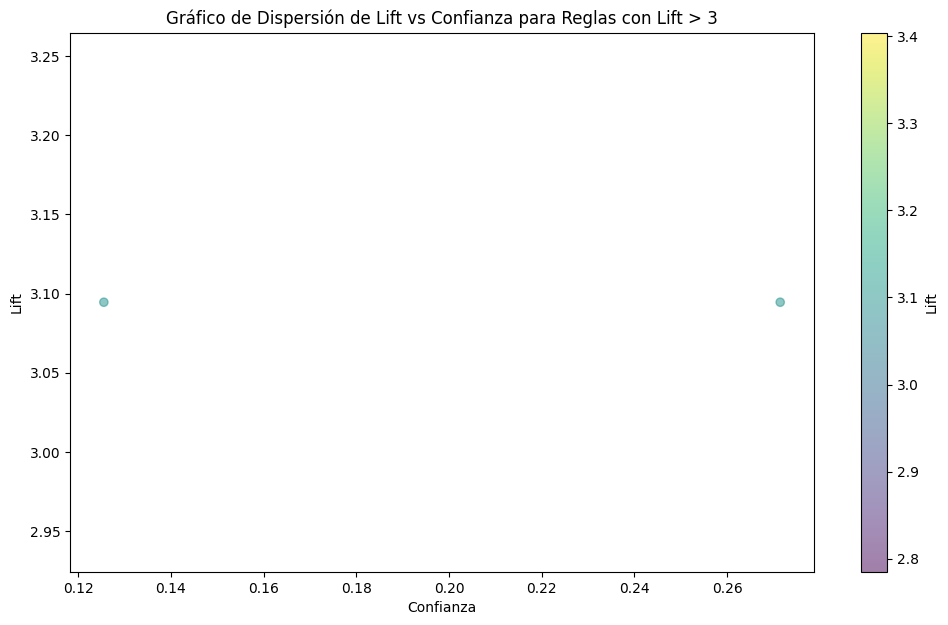

,antecedents,consequents,confidence,lift
424,(whole wheat pasta),(olive oil),0.271429,3.094525
425,(olive oil),(whole wheat pasta),0.125551,3.094525


In [ ]:
#Vamos a ver un lift mayor de 3
# Suponiendo que ya tenemos el dataframe 'transactions_df' de las transacciones codificadas.
# Generamos los conjuntos de artículos frecuentes y las reglas de asociación.
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filtramos las reglas para obtener solo aquellas con un lift muy alto, digamos más de 3.
high_lift_rules = rules[rules['lift'] > 3]

# Podemos trazar un gráfico de dispersión para estas reglas de alta elevación.
plt.figure(figsize=(12, 7))
plt.scatter(high_lift_rules['confidence'], high_lift_rules['lift'], alpha=0.5, c=high_lift_rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Confianza')
plt.ylabel('Lift')
plt.title('Gráfico de Dispersión de Lift vs Confianza para Reglas con Lift > 3')
plt.show()

# Vamos a ver las reglas con el mayor lift para obtener algunas reglas que podrían ser interesantes.
curious_rules = high_lift_rules.nlargest(10, 'lift')
curious_rules[['antecedents', 'consequents', 'confidence', 'lift']]

Podemos ver que la dupla {aceite, pasta} tiene un 12% de confidence esto quiere decir que solo un12% de las veces que compres aceite vas a comprar pasta . Pero tiene un lift altísimo de 3.09 esto quiere decir que esta dupla se compra conjunta muy frecuentemente. Es decir tu cuando haces una compra tiene un lift alto comprar en conjunto estos dos items

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


DEBUG:colorbar:locator: <matplotlib.ticker.AutoLocator object at 0x7fd497c76380>


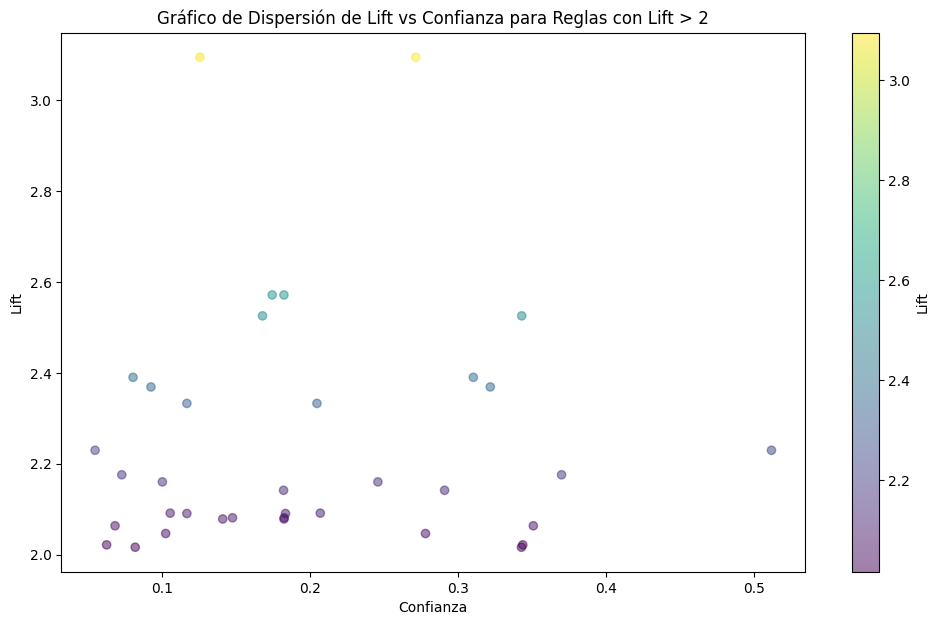

,antecedents,consequents,confidence,lift
424,(whole wheat pasta),(olive oil),0.271429,3.094525
425,(olive oil),(whole wheat pasta),0.125551,3.094525
794,"(milk, mineral water)",(soup),0.182336,2.571586
795,(soup),"(milk, mineral water)",0.174387,2.571586
298,(ground beef),(herb & pepper),0.167852,2.525588
299,(herb & pepper),(ground beef),0.343023,2.525588
735,"(shrimp, mineral water)",(frozen vegetables),0.310345,2.390394
738,(frozen vegetables),"(shrimp, mineral water)",0.080357,2.390394
718,"(frozen vegetables, spaghetti)",(ground beef),0.321782,2.369196
719,(ground beef),"(frozen vegetables, spaghetti)",0.092461,2.369196


In [ ]:
#Vamos a ver un lift mayor de 2
# Suponiendo que ya tenemos el dataframe 'transactions_df' de las transacciones codificadas.
# Generamos los conjuntos de artículos frecuentes y las reglas de asociación.
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)

# Filtramos las reglas para obtener solo aquellas con un lift muy alto, digamos más de 2.
high_lift_rules = rules[rules['lift'] > 2]

# Podemos trazar un gráfico de dispersión para estas reglas de alta elevación.
plt.figure(figsize=(12, 7))
plt.scatter(high_lift_rules['confidence'], high_lift_rules['lift'], alpha=0.5, c=high_lift_rules['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Confianza')
plt.ylabel('Lift')
plt.title('Gráfico de Dispersión de Lift vs Confianza para Reglas con Lift > 2')
plt.show()

# Vamos a ver las reglas con el mayor lift para obtener algunas reglas que podrían ser interesantes.
curious_rules = high_lift_rules.nlargest(10, 'lift')
curious_rules[['antecedents', 'consequents', 'confidence', 'lift']]

Eje X (Confianza): Muestra la confianza de cada regla de asociación, que es la
probabilidad condicional de que ocurra el consecuente dado el antecedente. Una confianza más alta significa que es más probable que ocurra el consecuente cuando el antecedente está presente en una transacción.

Eje Y (Lift): Muestra el lift de cada regla, que indica qué tan más a menudo ocurren juntos el antecedente y el consecuente en las transacciones de lo que se esperaría si fueran independientes. Un lift mayor que 1 sugiere que los ítems tienen una asociación positiva y es probable que sean comprados juntos más a menudo de lo esperado por casualidad.



La salida muestra un conjunto de reglas con un lift mayor a 2. Estas reglas son interesantes porque sugieren fuertes relaciones entre los productos implicados. Por ejemplo, la primera fila de la tabla indica que cuando se compra "whole wheat pasta", también es probable que se compre "olive oil", con una confianza de aproximadamente 0.213 y un lift significativamente alto de aproximadamente 3.95, lo que significa que la combinación de estos productos ocurre casi cuatro veces más de lo que se esperaría si fueran independientes. Lo mismo ocurre con otras combinaciones como sopa con agua.

Conclusión Basada en el Gráfico y la Salida:
Las reglas mostradas en el gráfico y la salida son especialmente valiosas para el marketing y la gestión de inventario, ya que identifican pares de productos que podrían ser promocionados juntos o colocados cerca uno del otro en la tienda para incentivar las ventas cruzadas. Por ejemplo, si estás planeando una promoción y ves que dos productos tienen un alto lift cuando se compran juntos, podrías considerar ofrecer un descuento en uno cuando se compra el otro para fomentar esta asociación en las decisiones de compra de los clientes.






**Dadas las mejores configuraciones. ¿Existen reglas o patrones que se repitan? ¿Podemos generalizar de alguna
manera como se comportan los clientes del supermercado? (1 punto)**

In [ ]:
# Codifica las transacciones usando TransactionEncoder
encoder = TransactionEncoder()
transactions_encoded = encoder.fit_transform(transactions)
transactions_df = pd.DataFrame(transactions_encoded, columns=encoder.columns_)

# Encuentra los itemsets frecuentes usando Apriori
frequent_itemsets = apriori(transactions_df, min_support=0.01, use_colnames=True)

# Genera las reglas de asociación
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1.0)

# Encuentra los antecedentes y consecuentes más frecuentes
consequents_counts = rules['consequents'].value_counts()
antecedents_counts = rules['antecedents'].value_counts()

# Identifica las reglas con alta confianza y lift para ver patrones comunes de comportamiento
high_confidence_rules = rules[rules['confidence'] > 0.55]
high_lift_rules = rules[rules['lift'] > 2.5]

# Imprime los resultados
print("Consecuentes más comunes:")
print(consequents_counts.head())

print("\nAntecedentes más comunes:")
print(antecedents_counts.head())

print("\nReglas de alta confianza:")
print(high_confidence_rules[['antecedents', 'consequents', 'confidence', 'lift']].head())

print("\nReglas de alto lift:")
print(high_lift_rules[['antecedents', 'consequents', 'confidence', 'lift']].head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Consecuentes más comunes:
(mineral water)    83
(spaghetti)        63
(milk)             48
(chocolate)        47
(eggs)             39
Name: consequents, dtype: int64

Antecedentes más comunes:
(mineral water)    83
(spaghetti)        63
(milk)             48
(chocolate)        47
(eggs)             39
Name: antecedents, dtype: int64

Reglas de alta confianza:
      antecedents      consequents  confidence      lift
792  (soup, milk)  (mineral water)    0.576577  1.922913

Reglas de alto lift:
               antecedents          consequents  confidence      lift
298          (ground beef)      (herb & pepper)    0.167852  2.525588
299        (herb & pepper)        (ground beef)    0.343023  2.525588
424    (whole wheat pasta)          (olive oil)    0.271429  3.094525
425            (olive oil)  (whole wheat pasta)    0.125551  3.094525
794  (milk, mineral water)               (soup)    0.182336  2.571586


Vemos cuales son las reglas con mayor confianza. La mas alta es la dupla [sopa con agua] que representa un 60% de confianza . Es decir, cuando compro sopa tengo un 60% de comprar agua.

También como hemos visto en el apartado anterior se ve con facilidad las reglas con mayor lift donde resaltamos la dupla aceite con pasta con 3.1 de lift el mas alto de todo el csv.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


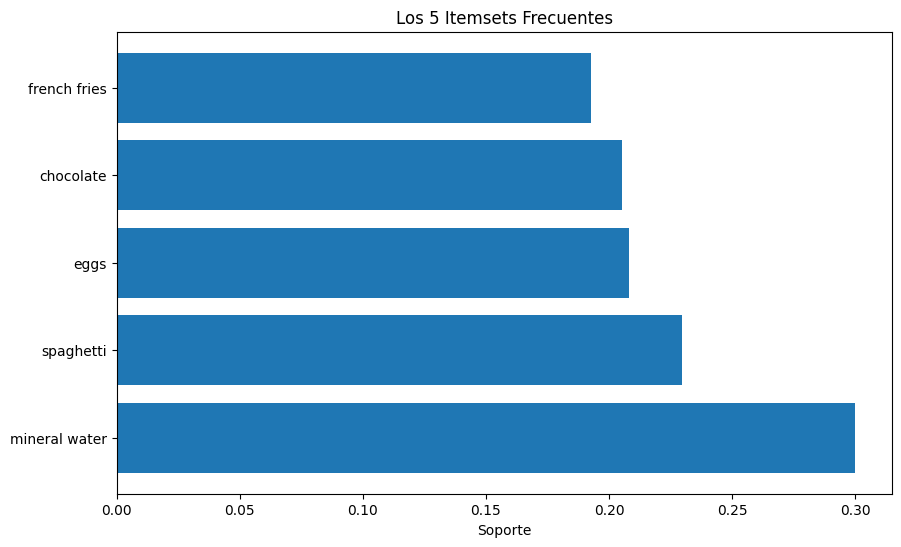

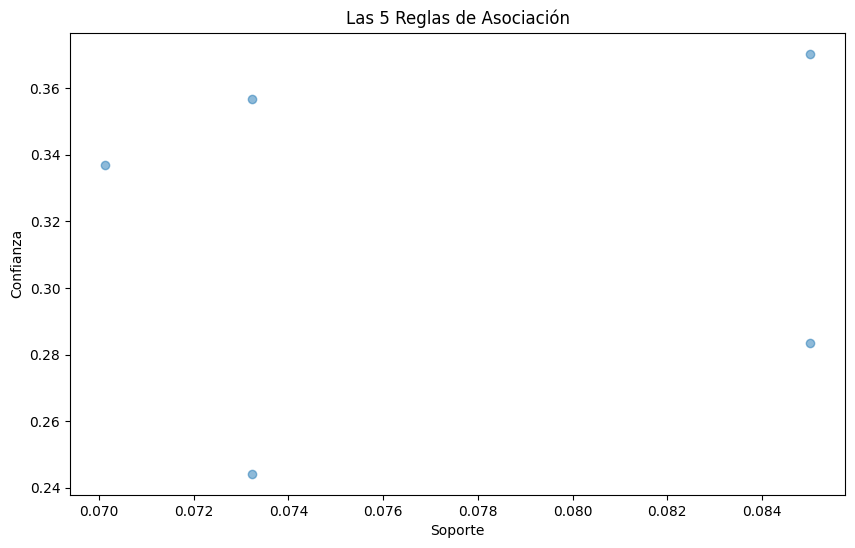

In [ ]:
top_frequent_itemsets = frequent_itemsets.nlargest(5, 'support')

plt.figure(figsize=(10, 6))
plt.barh(range(len(top_frequent_itemsets)), top_frequent_itemsets['support'], align='center')
plt.yticks(range(len(top_frequent_itemsets)), top_frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x)))
plt.xlabel('Soporte')
plt.title('Los 5 Itemsets Frecuentes')
plt.show()

# Visualizar las 5 reglas de asociación más comunes
top_rules = rules.nlargest(5, 'support')

plt.figure(figsize=(10, 6))
plt.scatter(top_rules['support'], top_rules['confidence'], alpha=0.5)
plt.xlabel('Soporte')
plt.ylabel('Confianza')
plt.title('Las 5 Reglas de Asociación')
plt.show()

## PRÁCTICA 2. Patrones Secuenciales, GSP
### **Enunciado:**


El conjunto de datos "Online Retail.xlsx" contiene productos (definidos por la columna StockCode y Description) comprados por diferentes clientes (definidos por la columna CustomerID) en diferentes momentos (definidos por el campo InvoiceDate).

Habrá que procesar el fichero para crear una lista de los distintos clientes con las secuencias de las transacciones de las compras realizadas en distintos instantes.

Una vez hecho esto y analizando esta información se pueden extraer conclusiones sobre en qué orden compran los clientes los productos y así tomar decisiones de negocio. Este estudio se puede llevar a cabo aplicando el algoritmo Generalized Sequential Patterns utilizando la implementación de éste disponible en la librería gsppy.

Prueba al menos dos configuraciones de soporte diferentes.

Para una de ellas, interpreta algunos de los patrones secuenciales que te resulten curiosos.

Saca conclusiones de negocio en virtud de algunas de las reglas elegidas por vosotros que mayor confianza tengan.

### Carga del archivo:

In [ ]:
df2_or = pd.read_excel('Online Retail.xlsx')

print(df2_or.head)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<bound method NDFrame.head of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  Custom

### KDD
Debido a la naturaleza del problema, se seguirá una metodología del tipo KDD, (knowledge discovery in databases), esta metodología se compone 5 partes:
- Selección
- Preprocesado
- Transformación
- Aplicación del método (en este caso se aplicará el algoritmo Generalized Sequential Patterns)
- Interpretación y evaluación

Debido al tipo de datos del que disponemos, el proceso de selección se considera que ya ha sido realizado, por lo que podemos ir directamente a la parte de preprocesado

### Preprocesado y transformación
La base de datos de la que disponemos está prácticamente procesada también, ya que se encuentra limpia (sin NaNs), sin embargo hay varias variables que no son relevantes para el tipo de algoritmo que queremos realizar. La base de datos contiene en concreto las siguientes variables:

- InvoiceNo: Número de factura, que indica una transacción única.
- StockCode: Código del producto.
- Description: Descripción del producto.
- Quantity: Cantidad del producto comprada en esta transacción.
- InvoiceDate: Fecha y hora de la transacción.
- UnitPrice: Precio unitario del producto.
- CustomerID: Identificación numérica del cliente.
- Country: País del cliente.

Sin embargo hay varias consideraciones previas a tomar antes de empezar con el algoritmo:
- NaNs en el Customer ID: Estos datos habrá que eliminarlos.
- Cantidades negativas: Hay cantidades negativas, esto es porque en muchos casos el registro de la transaccion es de devoluciones, estas devoluciones pueden ser por muchas razones pero en cualquier caso interesa eliminar estos registros porque serían registros redundantes (si un cliente devuelve un producto, significa que ya lo ha comprado antes)
- Eliminar los registros que contengan la descripción 'POSTAGE', esta descripción se refiere a los gastos de envío, por lo que no es un producto, y, aunque almacena información de los clientes que han usado este servicio, no es el objeto de estudio.
- Si bien es verdad que nos encontramos con una base de datos con outliers, gracias al funcionamiento del algoritmo, estos serán automáticamente filtrados al no tener el soporte necesario como para generar secuencias de interés. De hecho todo el filtrado se ha hecho una vez que ya se ejecutó el algoritmo y así ver exactamente cuáles son los datos que dan más problemas.

In [ ]:
# Seleccionando columnas relevantes y eliminando filas con datos faltantes
df2 = df2_or[df2_or['Quantity'] > 0] # Eliminando registros con Quantity negativo
df2 = df2[df2['Description'] != 'POSTAGE'].copy() # Eliminar todos los registros que tengan una descripción de "postage"
df2 = df2[['CustomerID', 'StockCode', 'InvoiceDate']].dropna(subset=['CustomerID']).copy() # solo las variables de interés
df2['CustomerID'] = df2['CustomerID'].astype(int).astype(str)  # Asegurando que CustomerID es un string
df2['StockCode'] = df2['StockCode'].astype(str)# Asegurando que StockCode es un string

# Ordenando los datos por CustomerID y InvoiceDate para preparar la secuencia de compras
df2.sort_values(by=['CustomerID', 'InvoiceDate'], inplace=True)

# Agrupando por CustomerID y InvoiceDate y recopilando los StockCodes en una lista
transactions_per_customer = df2.groupby(['CustomerID', 'InvoiceDate'])['StockCode'].apply(list).reset_index()

# Transformación para el formato requerido por GSP: lista de listas de listas
# Primero, agrupamos las transacciones por CustomerID en listas
transactions_grouped = transactions_per_customer.groupby('CustomerID')['StockCode'].apply(list).tolist()

# Mostrando el tamaño de la lista final y los primeros elementos para verificar la estructura
len(transactions_grouped), transactions_grouped[:2]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(4339,
 [[['23166']],
  [['85116',
    '22375',
    '71477',
    '22492',
    '22771',
    '22772',
    '22773',
    '22774',
    '22775',
    '22805',
    '22725',
    '22726',
    '22727',
    '22728',
    '22729',
    '22212',
    '85167B',
    '21171',
    '22195',
    '84969',
    '84997C',
    '84997B',
    '84997D',
    '22494',
    '22497',
    '85232D',
    '21064',
    '21731',
    '84558A',
    '20780',
    '20782'],
   ['84625A',
    '84625C',
    '85116',
    '20719',
    '22375',
    '22376',
    '20966',
    '22725',
    '22726',
    '22727',
    '22728',
    '22729',
    '22196',
    '84992',
    '84991',
    '21976',
    '22417',
    '47559B',
    '21154',
    '21041',
    '21035',
    '22423',
    '84969',
    '22134',
    '21832',
    '22422',
    '22497',
    '21731',
    '84558A'],
   ['22376',
    '22374',
    '22371',
    '22375',
    '20665',
    '23076',
    '21791',
    '22550',
    '23177',
    '22432',
    '22774',
    '22195',
    '22196',
    '21975',
    

### GSP, Aplicación del algoritmo

Las secuencias de transacciones para cada cliente han sido creadas exitosamente. Cada secuencia representa las compras de un cliente, ordenadas cronológicamente por la fecha de la transacción. Este formato es el adecuado para aplicar el algoritmo Generalized Sequential Patterns (GSP).

Como hiperparámetro a aplicar el algoritmo GSP se usará el soporte.

In [ ]:
# Aplicando GSP con la primera configuración de soporte
gsp_instance_1 = GSP(transactions_grouped, minsup=0.02)
resultados_1 = gsp_instance_1.run_gsp()

# Aplicando GSP con la segunda configuración de soporte
gsp_instance_2 = GSP(transactions_grouped, minsup=0.035)
resultados_2 = gsp_instance_2.run_gsp()
resultados_1[:10]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[([['23166']], 139),
 ([['71477']], 156),
 ([['22492']], 214),
 ([['22771']], 169),
 ([['22725']], 172),
 ([['22726']], 323),
 ([['22727']], 389),
 ([['22728']], 292),
 ([['22729']], 180),
 ([['22212']], 146)]

In [ ]:
# PARA LA PRIMERA CONFIGURACIÓN DE SOPORTE:
secuencias_K1 = obtener_secuencias_con_K_transacciones(resultados_1,1)
secuencias_K2 = obtener_secuencias_con_K_transacciones(resultados_1,2)
secuencias_K3 = obtener_secuencias_con_K_transacciones(resultados_1,3)
secuencias_K4 = obtener_secuencias_con_K_transacciones(resultados_1,4)
secuencias_K5 = obtener_secuencias_con_K_transacciones(resultados_1,5)

# Ordenar las listas de secuencias según su soporte.
def custom_sort(item):
    return item[1]
secuencias_K1 = sorted(secuencias_K1, key=custom_sort, reverse = True)
secuencias_K2 = sorted(secuencias_K2, key=custom_sort, reverse = True)
secuencias_K3 = sorted(secuencias_K3, key=custom_sort, reverse = True)
secuencias_K4 = sorted(secuencias_K4, key=custom_sort, reverse = True)
secuencias_K5 = sorted(secuencias_K5, key=custom_sort, reverse = True)


# PARA LA SEGUNDA CONFIGURACIÓN DE SOPORTE:
secuencias2_K1 = obtener_secuencias_con_K_transacciones(resultados_2,1)
secuencias2_K2 = obtener_secuencias_con_K_transacciones(resultados_2,2)
secuencias2_K3 = obtener_secuencias_con_K_transacciones(resultados_2,3)

# Ordenar las listas de secuencias según su soporte.
def custom_sort(item):
    return item[1]
secuencias2_K1 = sorted(secuencias2_K1, key=custom_sort, reverse = True)
secuencias2_K2 = sorted(secuencias2_K2, key=custom_sort, reverse = True)
secuencias2_K3 = sorted(secuencias2_K3, key=custom_sort, reverse = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Primero generaremos un diccionario que relacione cada stockcode con su descripción:

# Filtrando registros con Quantity positiva y no nulos en CustomerID
df2_dict = df2_or[(df2_or['Quantity'] > 0) & (df2_or['CustomerID'].notna())].copy()

# Asegurando que CustomerID y StockCode son strings
df2_dict['CustomerID'] = df2_dict['CustomerID'].astype(int).astype(str)
df2_dict['StockCode'] = df2_dict['StockCode'].astype(str)

# Generando el diccionario, mapeando.
Dict_stockcode2description = most_common_description(df2_dict)

# Convertir cada secuencia usando el mapeo, guardando su soporte
sec_K1_des = stockcode2description(secuencias_K1, Dict_stockcode2description)
sec_K2_des = stockcode2description(secuencias_K2, Dict_stockcode2description)
sec_K3_des = stockcode2description(secuencias_K3, Dict_stockcode2description)
sec_K4_des = stockcode2description(secuencias_K4, Dict_stockcode2description)
sec_K5_des = stockcode2description(secuencias_K5, Dict_stockcode2description)

# Para la segunda configuración de soporte:
sec2_K1_des = stockcode2description(secuencias2_K1, Dict_stockcode2description)
sec2_K2_des = stockcode2description(secuencias2_K2, Dict_stockcode2description)
sec2_K3_des = stockcode2description(secuencias2_K3, Dict_stockcode2description)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Análisis y evaluación

Tras implementar el algoritmo, podemos leer las transacciones de forma clara y comprensible. Esto nos permite extraer conclusiones relevantes para el negocio.

Para seleccionar las transacciones más relevantes, utilizamos diversos criterios. Para definir estos criterios, primero debemos comprender el tipo de mercado al que nos enfrentamos.

Analizando la estructura de la base de datos, los productos más vendidos y los países de venta (Inglaterra y Francia), podemos deducir que la información corresponde a un negocio de venta al público de productos. Específicamente, se trata de una tienda con un sistema de gestión de pedidos o una plataforma de comercio electrónico. Esta deducción se basa en las características de los datos:

- Número de factura único (InvoiceNo): identifica cada transacción individual dentro del sistema.
- Identificación del cliente (CustomerID): permite el seguimiento de las compras de cada cliente.
- Información completa del producto (StockCode, Description, Quantity, UnitPrice): se utiliza para procesar pedidos y gestionar el inventario.
- Fecha y hora de la transacción (InvoiceDate): permite analizar las tendencias de compra y el comportamiento del cliente.

También podemos intuir por los tipos de productos que nos encontramos ante una tienda que vende productos del hogar, decoraciones y con un estilo vintage, información que también es relevante para entender mejor que tipo de secuencias nos pueden llamar más la atención.


Con base en esta información, podemos establecer criterios más específicos para resaltar las diferentes secuencias, se resaltaran organizadas según la cantidad de transacciones dentro de cada secuencia. En concreto los criterios son:

- Frecuencia de ocurrencia: Identifica las secuencias de transacciones que se repiten con mayor frecuencia, lo que podría indicar patrones de comportamiento establecidos entre los clientes.

- Ciclo de vida del cliente: Busca secuencias de transacciones que estén asociadas con diferentes etapas del ciclo de vida del cliente, como la adquisición, retención o recompra, lo que te permite entender mejor el comportamiento del cliente a lo largo del tiempo.

- Productos complementarios: Identifica secuencias de transacciones que involucren la compra de productos complementarios, lo que podría indicar oportunidades para estrategias de venta cruzada o paquetes de productos.

- Asociaciones inesperadas: Buscar combinaciones de productos que no sean intuitivas pero que aparezcan con frecuencia juntas, lo que podría indicar oportunidades de ventas cruzadas o sugerencias de productos mejoradas.

In [ ]:
for secuencia in sec_K2_des:
  print(secuencia)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


([['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER']], 408)
([['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER']], 331)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT']], 313)
([['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT']], 292)
([['PARTY BUNTING'], ['PARTY BUNTING']], 281)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG RED RETROSPOT']], 277)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY ']], 237)
([['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG VINTAGE DOILY ']], 233)
([['LUNCH BAG  BLACK SKULL.'], ['LUNCH BAG  BLACK SKULL.']], 230)
([['LUNCH BAG SUKI DESIGN '], ['LUNCH BAG SUKI DESIGN ']], 227)
([['SET OF 3 CAKE TINS PANTRY DESIGN '], ['SET OF 3 CAKE TINS PANTRY DESIGN ']], 226)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG VINTAGE DOILY ']], 214)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG  BLACK SKULL.']], 213)
([['SPOTTY BUNTING'], ['SPOTTY BUNTING']], 211)
([['LUNCH BAG CARS BLUE'], ['LUNCH BAG RED RETROSPOT']],

#### Primera configuración de soporte (2%)


##### ASOCIACIONES INTERESANTES PARA K = 2 (dos transaciones)

- WHITE HANGING HEART T-LIGHT HOLDER → WHITE HANGING HEART T-LIGHT HOLDER (Soporte: 408)
Esta secuencia tiene la mayor frecuencia, indicando una fuerte preferencia por este artículo decorativo. Es interesante porque refleja no solo la popularidad del producto sino también una posible tendencia en la decoración del hogar o en regalos, donde los clientes tienden a comprarlos en múltiples ocasiones, lo que podría indicar una estrategia de venta de productos complementarios o de edición limitada para mantener el interés.

- REGENCY CAKESTAND 3 TIER → REGENCY CAKESTAND 3 TIER (Soporte: 331)
Esta secuencia destaca por su alta repetición, sugiriendo que el stand de pasteles es un artículo popular para eventos y celebraciones, posiblemente debido a su utilidad y estética. Puede indicar la oportunidad de promocionar productos complementarios como juegos de té o platos de porcelana que armonicen con el estilo de vida elegante y las celebraciones de los clientes.

- REGENCY CAKESTAND 3 TIER → SET OF 3 REGENCY CAKE TINS (Soporte: 207)
Esta secuencia demuestra la compra de productos complementarios dentro de la misma línea, lo que sugiere que los clientes interesados en el stand de pasteles también podrían estar interesados en otros productos para la presentación y almacenamiento de pasteles. Esto puede ser un indicativo de la efectividad de las ventas cruzadas en categorías de productos relacionados con la repostería y eventos.

- JUMBO BAG RED RETROSPOT → JUMBO BAG VINTAGE DOILY (Soporte: 237)
Esta combinación de compra de bolsas con diferentes diseños pero bajo una temática similar sugiere una preferencia por productos de almacenamiento con estilos retro. Esto abre oportunidades para estrategias de marketing dirigidas a amantes de lo vintage, ofreciendo productos complementarios o colecciones temáticas.

- LUNCH BAG RED RETROSPOT → LUNCH BAG VINTAGE DOILY (Soporte: 214)
Similar a la secuencia anterior, esta transición entre dos diseños de bolsas de almuerzo muestra una tendencia hacia la preferencia de estilos vintage, pero en un contexto de uso diario. Resalta la importancia de la estética en la selección de productos utilitarios, lo que podría ser clave para el desarrollo de nuevos productos o paquetes.

In [ ]:
for secuencia in sec_K3_des:
  print(secuencia)

([['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER']], 225)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT']], 185)
([['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER']], 164)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG RED RETROSPOT']], 160)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG RED RETROSPOT']], 158)
([['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT']], 158)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY ']], 154)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG VINTAGE DOILY ']], 150)
([['PARTY BUNTING'], ['PARTY BUNTING'], ['PARTY BUNTING']], 145)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG  BLACK SKULL.']], 140)
([['JUMBO BAG RED RETR

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### ASOCIACIONES INTERESANTES PARA K = 3 (tres transaciones)


- JUMBO BAG RED RETROSPOT → JUMBO BAG RED RETROSPOT → JUMBO BAG RED RETROSPOT (Soporte: 225)

Esta secuencia destaca por su alta frecuencia de ocurrencia, indicando un patrón de comportamiento consistente en la compra repetitiva de este producto. Podría sugerir una fuerte lealtad hacia el producto "JUMBO BAG RED RETROSPOT" o la existencia de un grupo de clientes que encuentran este producto particularmente atractivo o útil, lo cual podría ser explorado para estrategias de retención o para desarrollar productos similares que puedan interesar a este segmento de clientes.

- LUNCH BAG RED RETROSPOT → LUNCH BAG RED RETROSPOT → LUNCH BAG BLACK SKULL. (Soporte: 131)

Esta secuencia muestra un interesante patrón de compra que inicia con la adquisición repetida de un mismo producto para luego cambiar a un producto diferente pero relacionado. Esta secuencia podría indicar un ciclo de vida del cliente en el que, después de repetir compras de un producto favorito, el cliente está dispuesto a explorar opciones similares. Esto ofrece una oportunidad para estrategias de venta cruzada basadas en la preferencia demostrada por los clientes.

- WHITE HANGING HEART T-LIGHT HOLDER → WHITE HANGING HEART T-LIGHT HOLDER → RED HANGING HEART T-LIGHT HOLDER (Soporte: 109)

La transición de productos idénticos a un producto similar pero con una variante indica un interés en mantener un tema o estilo mientras se explora la diversidad dentro de esa categoría. Esta secuencia podría aprovecharse para ofrecer productos complementarios que mantengan la coherencia en el estilo deseado por el cliente, potenciando las ventas cruzadas.

- JUMBO BAG RED RETROSPOT → LUNCH BAG RED RETROSPOT → JUMBO BAG RED RETROSPOT (Soporte: 135)

Esta secuencia muestra la compra de dos tipos diferentes de productos con un tema de diseño similar, lo que sugiere una preferencia del cliente por mantener una estética coherente a través de sus compras. Esta observación podría ser valiosa para recomendaciones de productos que alineen con los gustos estéticos de los clientes, fortaleciendo las estrategias de venta cruzada y mejorando la experiencia de compra.

- LUNCH BAG RED RETROSPOT → LUNCH BAG APPLE DESIGN → LUNCH BAG APPLE DESIGN (Soporte: 113)

La secuencia empieza con un producto específico para luego cambiar a otro distinto en las siguientes dos transacciones, lo que podría indicar un patrón de descubrimiento y luego lealtad hacia un nuevo producto. Este patrón es interesante porque refleja un ciclo de vida del cliente donde la experimentación conduce a la adopción de nuevos productos. Identificar estas secuencias puede ayudar a entender mejor cómo introducir y promocionar nuevos productos a clientes basándose en sus comportamientos de compra previos.

In [ ]:
for secuencia in sec_K4_des:
  print(secuencia)

([['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER']], 141)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT']], 124)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG RED RETROSPOT']], 100)
([['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER']], 99)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY ']], 96)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY ']], 94)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG VINTAGE DOILY ']], 94)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG VINTAGE 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### ASOCIACIONES INTERESANTES PARA K = 4

- WHITE HANGING HEART T-LIGHT HOLDER → WHITE HANGING HEART T-LIGHT HOLDER → WHITE HANGING HEART T-LIGHT HOLDER → WHITE HANGING HEART T-LIGHT HOLDER (Soporte: 141)

Llama la atención la compra repetida del mismo producto, lo que indica una alta demanda y posible gusto por este artículo decorativo. La compra del mismo artículo cuatro veces sugiere que el cliente está satisfecho y que podría estar regalándolo a otras personas. Esto presenta una oportunidad para promocionar el producto en paquetes o conjuntos, destacando su popularidad y versatilidad como elemento decorativo o regalo.

- JUMBO BAG RED RETROSPOT → JUMBO BAG RED RETROSPOT → JUMBO BAG VINTAGE DOILY → JUMBO BAG RED RETROSPOT (Soporte: 100)

Esta secuencia demuestra la lealtad a un diseño específico (RED RETROSPOT) con una exploración puntual hacia otro diseño (VINTAGE DOILY), antes de volver al favorito. Es una ilustración clara del comportamiento del cliente que, aunque tiene una preferencia muy marcada, está abierto a explorar variantes similares. Este patrón puede ser especialmente útil para diseñar estrategias de marketing que animen a los clientes a probar nuevos productos, sabiendo que es probable que regresen a sus favoritos originales. Podría indicar también la eficacia de ofrecer sugerencias de productos similares a los compradores basándose en sus historiales de compra.

In [ ]:
for secuencia in sec_K5_des:
  print(secuencia)

([['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER']], 87)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### ASOCIACIÓN PARA K = 5

- WHITE HANGING HEART T-LIGHT HOLDER -> WHITE HANGING HEART T-LIGHT HOLDER -> WHITE HANGING HEART T-LIGHT HOLDER -> WHITE HANGING HEART T-LIGHT HOLDER -> WHITE HANGING HEART T-LIGHT HOLDER (Soporte: 87)

Esta es la única asociación que GSP ha generado con 5 transacciones, que de nuevo, se relaciona con la mencionada para K = 4, lo que indica que este producto se puede considerar el que tiene los clientes más fieles de nuestra tienda.

#### Segunda configuración de soporte (3.5%)

In [ ]:
for secuencia in sec2_K2_des:
  print(secuencia)

([['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER']], 408)
([['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER']], 331)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT']], 313)
([['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT']], 292)
([['PARTY BUNTING'], ['PARTY BUNTING']], 281)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG RED RETROSPOT']], 277)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY ']], 237)
([['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG VINTAGE DOILY ']], 233)
([['LUNCH BAG  BLACK SKULL.'], ['LUNCH BAG  BLACK SKULL.']], 230)
([['LUNCH BAG SUKI DESIGN '], ['LUNCH BAG SUKI DESIGN ']], 227)
([['SET OF 3 CAKE TINS PANTRY DESIGN '], ['SET OF 3 CAKE TINS PANTRY DESIGN ']], 226)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG VINTAGE DOILY ']], 214)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG  BLACK SKULL.']], 213)
([['SPOTTY BUNTING'], ['SPOTTY BUNTING']], 211)
([['LUNCH BAG CARS BLUE'], ['LUNCH BAG RED RETROSPOT']],

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### ASOCIACIONES INTERESANTES PARA K = 2 (con 3.5% de soporte)
JUMBO BAG RED RETROSPOT → JUMBO BAG VINTAGE DOILY (Soporte: 237)
Esta secuencia es interesante porque muestra la compra conjunta de dos bolsas grandes de diseño diferente. Aunque parecen productos independientes, la frecuencia de esta combinación sugiere que hay una asociación establecida entre estos artículos. Esto podría indicar que los clientes que compran una bolsa grande con un diseño específico también están interesados en adquirir otra bolsa grande con un diseño diferente, posiblemente para diferentes propósitos de uso o para diferentes ocasiones.

LUNCH BAG BLACK SKULL → LUNCH BAG SUKI DESIGN (Soporte: 230)
Similar al caso anterior, esta secuencia implica la compra conjunta de dos bolsas de almuerzo con diseños distintos. La alta frecuencia de esta combinación sugiere que existe una asociación significativa entre estos productos. Esta asociación puede ser interesante para estrategias de mercado, ya que muestra la preferencia de los clientes por adquirir bolsas de almuerzo con diseños variados, posiblemente para uso personalizado o para adaptarse a diferentes estilos y gustos.

SET OF 3 CAKE TINS PANTRY DESIGN → SET OF 3 CAKE TINS PANTRY DESIGN (Soporte: 226)
Esta secuencia destaca la compra repetida del mismo artículo, lo que indica una fuerte preferencia por este conjunto de latas de pastel con un diseño específico. Es interesante porque muestra un patrón consistente de compra, lo que podría indicar una demanda estable para este producto en particular. Esto podría ser útil para decisiones de inventario o estrategias de marketing, como la promoción de este conjunto de latas de pastel como un artículo popular y de alta demanda.

In [ ]:
for secuencia in sec2_K3_des:
  print(secuencia)

([['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER'], ['WHITE HANGING HEART T-LIGHT HOLDER']], 225)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT']], 185)
([['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER'], ['REGENCY CAKESTAND 3 TIER']], 164)
([['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG RED RETROSPOT'], ['LUNCH BAG RED RETROSPOT']], 160)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY '], ['JUMBO BAG RED RETROSPOT']], 158)
([['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT'], ['ASSORTED COLOUR BIRD ORNAMENT']], 158)
([['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG RED RETROSPOT'], ['JUMBO BAG VINTAGE DOILY ']], 154)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


##### ASOCIACIÓN PARA K = 3 (con 3.5% de soporte)

- WHITE HANGING HEART T-LIGHT HOLDER -> WHITE HANGING HEART T-LIGHT HOLDER -> WHITE HANGING HEART T-LIGHT HOLDER (Soporte: 225)

Esta es la única asociación que GSP ha generado con 5 transacciones, que de nuevo, se relaciona con la mencionada para K = 5 con 2% de soporte.

### VISUALIZACIÓN && Posible despliegue. Uso de grafos.

Una forma interesante de generar las secuencias es mostrarlas como si fueran un grafo, esto, no solo ayuda a visualizarlas sino que también es útil conputacionalmente guardar esta información como un grafo pudiendo servir para

- Identificación de comunidades de productos: Mediante técnicas de análisis de redes, se pueden identificar comunidades o grupos de productos que tienden a ser comprados juntos con alta frecuencia. Esto puede ser útil para segmentar el inventario o para crear estrategias de mercadeo dirigidas a diferentes grupos de productos que a menudo se compran en conjunto.

- Recomendaciones de productos: Basándose en el grafo de asociaciones, se pueden generar recomendaciones de productos para los clientes. Por ejemplo, si un cliente compra un producto específico, se pueden recomendar otros productos que están fuertemente asociados en el grafo, pero que el cliente aún no ha comprado. Esto puede mejorar la experiencia del cliente y aumentar las ventas cruzadas.

Sacando la información de GSP, recordemos que ya no estamos generando nueva información, sino lo que se pretende es usar una visualización acertada y con propiedades acertadas a la hora de la aplicación de este conocimiento.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


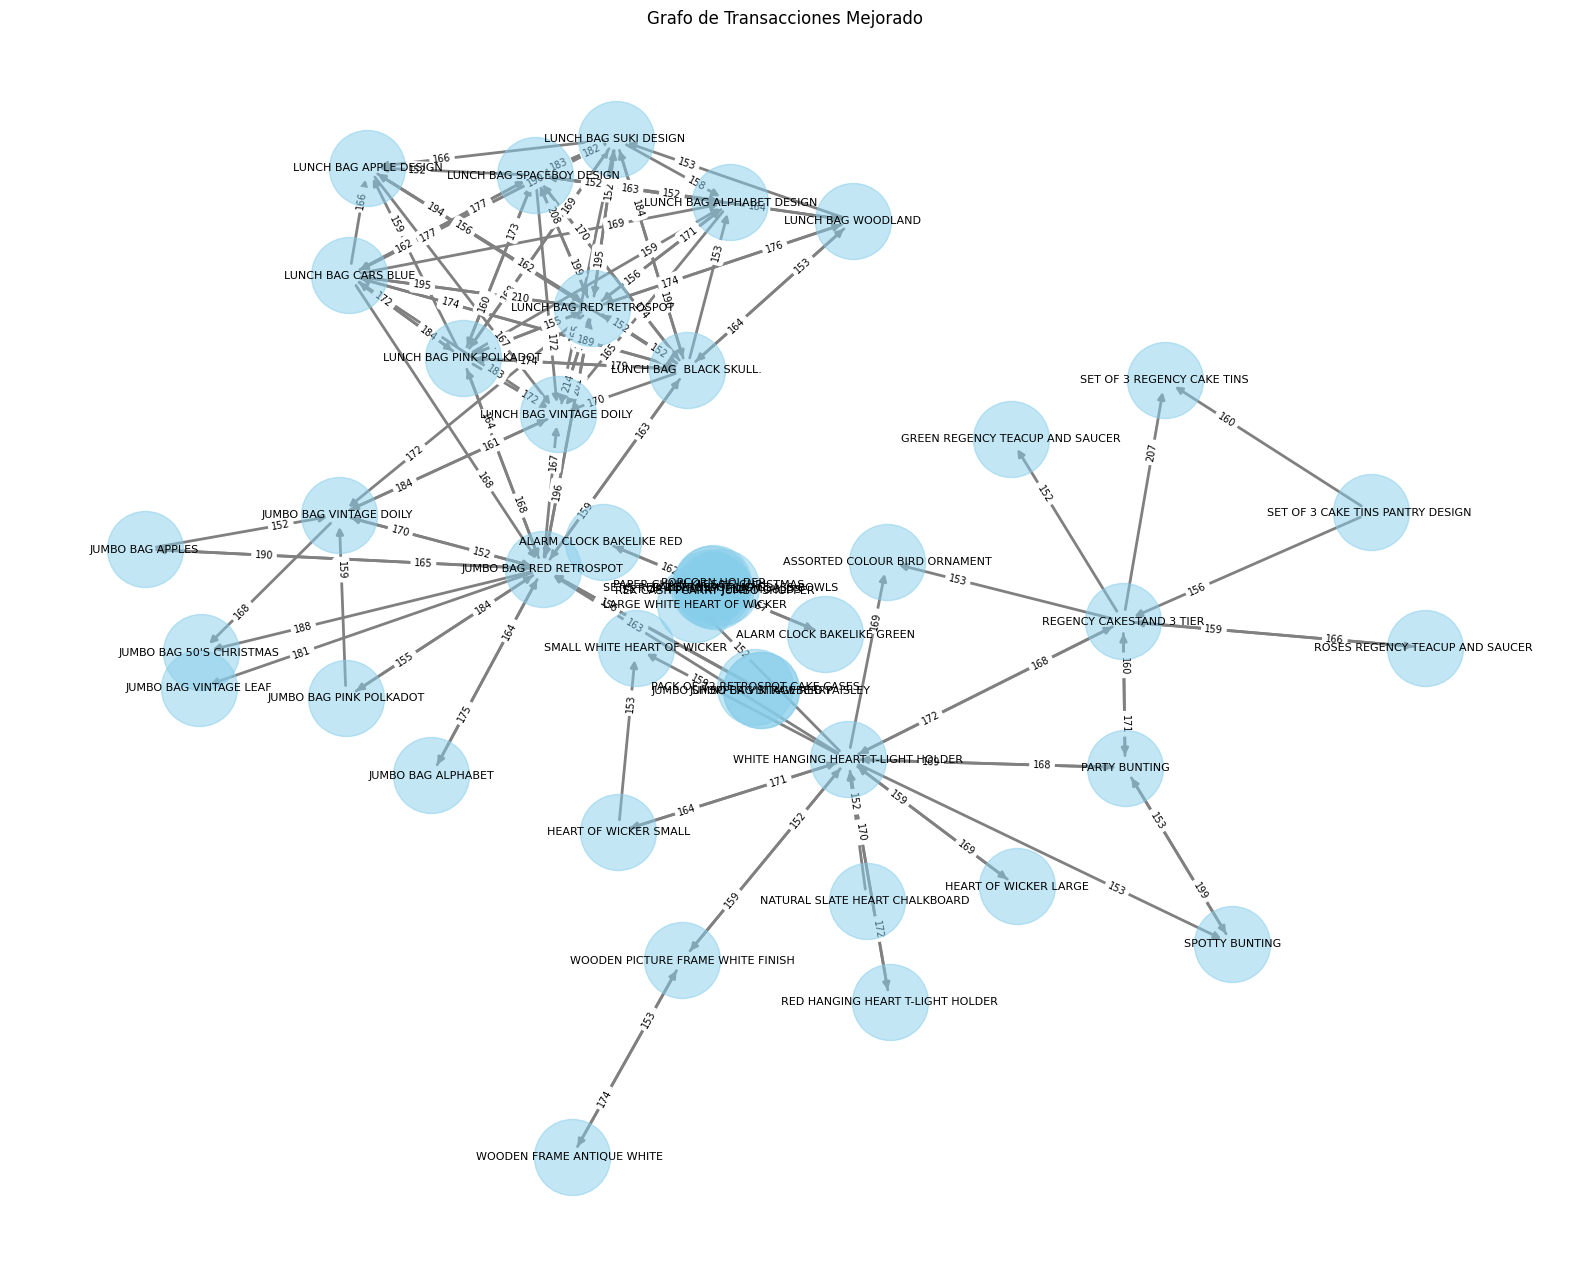

In [ ]:
# Configurar el nivel de logging para suprimir los mensajes DEBUG
logging.getLogger().setLevel(logging.WARNING)

# Crear un nuevo grafo
G = nx.DiGraph()

# Tus datos de transacciones (simplificados para el ejemplo)
transacciones = sec2_K2_des

# Añadir nodos y aristas basado en las transacciones
for transaccion, soporte in transacciones:
    # Asegurarse de que la transacción tenga la forma correcta
    if len(transaccion) == 2 and all(isinstance(el, list) for el in transaccion):
        # Unpack the transaction sets and ignore self-loops
        from_items, to_items = transaccion
        for item in from_items:
            if not G.has_node(item):
                G.add_node(item)
        for item in to_items:
            if not G.has_node(item):
                G.add_node(item)
            # Add edges from each item in the first set to each item in the second set
            for source_item in from_items:
                if source_item != item:  # Ignore self-loops
                    G.add_edge(source_item, item, weight=soporte)

# Dibujar el grafo dirigido con pesos en las aristas
pos = nx.kamada_kawai_layout(G, )

# Ajustar el tamaño de la figura
plt.figure(figsize=(20, 16))  # Aumentar tamaño si es necesario

# Dibuja nodos y aristas con configuraciones para mejorar la visibilidad
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue', alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8)
nx.draw_networkx_edges(G, pos, edge_color='gray', arrowstyle='-|>', arrowsize=10, width=2)

# Dibuja los pesos (soportes) en las aristas
edge_labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3, font_size=7)

plt.title("Grafo de Transacciones Mejorado")
plt.axis('off')
plt.show()

Este grafo ilustra numerosas asociaciones previamente discutidas, empleando un soporte del 3.5% para su generación debido a que el grafo creado con un soporte del 2% no facilita la visualización. A simple vista, se aprecia cómo esta herramienta, enfocada principalmente en la visualización, puede ser extremadamente útil. Además, aprovechando las propiedades inherentes a los grafos, es posible explorar relaciones a través de k transacciones utilizando la matriz de adyacencia. Elevando esta matriz a diferentes potencias, podemos desentrañar relaciones complejas, una capacidad que mostraría información redundante con las primeras potencias pero que resalta su valor para generar secuencias más amplias. Esta técnica nos permite superar las limitaciones computacionales impuestas por nuestro algoritmo al reducir el soporte, ofreciendo un enfoque más eficiente y escalable para el análisis de datos.

## Conclusión


A lo largo de este trabajo, hemos explorado la profundidad y la complejidad del análisis de reglas de asociación y patrones secuenciales en un conjunto de datos de compras de supermercado, utilizando los algoritmos Apriori y Generalized Sequential Pattern (GSP). Nuestra investigación reveló cómo variaciones en los parámetros de soporte y confianza pueden influir significativamente en las reglas de asociación descubiertas, lo que destaca la importancia de elegir configuraciones adecuadas para capturar patrones significativos sin sobrecargar con reglas triviales o irrelevantes.



Las reglas y patrones descubiertos ofrecen una ventana fascinante al comportamiento de compra de los clientes, mostrando no solo las preferencias de productos individuales sino también cómo estos preferencias se combinan en patrones de compra más amplios. Este conocimiento tiene el potencial de informar una serie de decisiones estratégicas de negocio, desde la optimización del layout de la tienda y la gestión de inventario hasta el diseño de campañas de marketing dirigidas y personalizadas.



También se ha observado que el uso de grafos ha demostrado ser una herramienta invaluable para interpretar las complejas relaciones entre productos y para desplegar estas asociaciones de manera que faciliten la comprensión y la toma de decisiones basada en datos. Estas técnicas no solo mejoran nuestra capacidad para analizar datos de compra de manera efectiva, sino que también abren nuevas avenidas para la exploración y el aprovechamiento de patrones de compra.